In [4]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [38]:
x = tf.placeholder(tf.float32, [None, 784])

In [39]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [40]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [41]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [42]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [60]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [61]:
sess = tf.InteractiveSession()

In [75]:
tf.global_variables_initializer().run()

In [63]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [71]:
test_dict = {x: mnist.test.images, y_: mnist.test.labels}
train_dict = {x: mnist.train.images, y_: mnist.train.labels}
measuements = {'xe_train': [cross_entropy, train_dict],
               'xe_test': [cross_entropy, test_dict],
               'acc_train': [accuracy, train_dict],
               'acc_test': [accuracy, test_dict]}

In [76]:
measured = {i: [] for i in measuements}
for i in range(2000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    if i % 20 == 0:
        for m in measuements:
            func, d = measuements[m]
            measured[m].append(sess.run(func, feed_dict=d))
        xe.append(xe_)
        acc.append(acc_)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

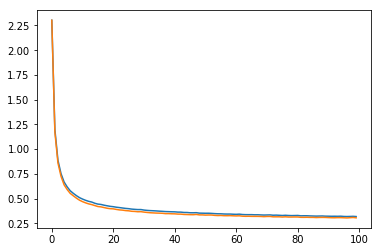

In [77]:
for m in ('xe_train', 'xe_test'):
    plt.plot(measured[m])

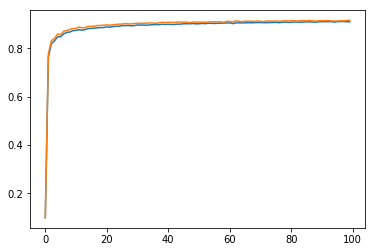

In [78]:
for m in ('acc_train', 'acc_test'):
    plt.plot(measured[m])